In [1]:
import numpy as np
from scipy.linalg import inv
from scipy.ndimage import rotate
from matplotlib import pyplot as plt
from sklearn import datasets
import itertools

import ardent

Text(0.5, 1.0, 'deformed_template')

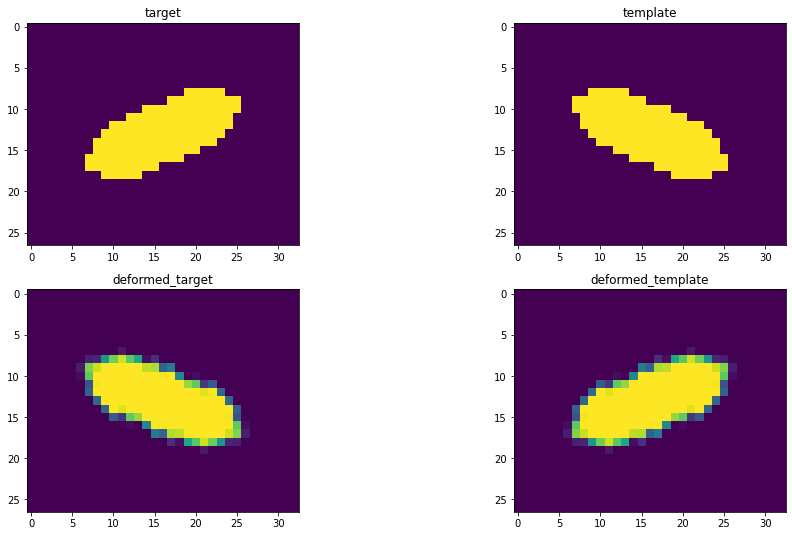

In [18]:
template = np.array([[(col-14)**2/10**2 + (row-8)**2/4**2 <= 1 for col in range(29)] for row in range(17)], int)
target = rotate(template, 45/2)
template = rotate(template, -45/2)

transform = ardent.Transform()
transform.register(target=target, template=template,
                   num_iterations=50, num_affine_only_iterations=50,
                   num_rigid_affine_iterations=50)

deformed_target = transform.transform_image(
    subject=target,
    output_shape=template.shape,
    deform_to='template')

deformed_template = transform.transform_image(
    subject=template,
    output_shape=target.shape,
    deform_to='target')

#plot
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.imshow(target)
plt.title("target")
plt.subplot(222)
plt.imshow(template)
plt.title("template")
plt.subplot(223)
plt.imshow(deformed_target)
plt.title("deformed_target")
plt.subplot(224)
plt.imshow(deformed_template)
plt.title("deformed_template")

Text(0.5, 1.0, 'deformed_template')

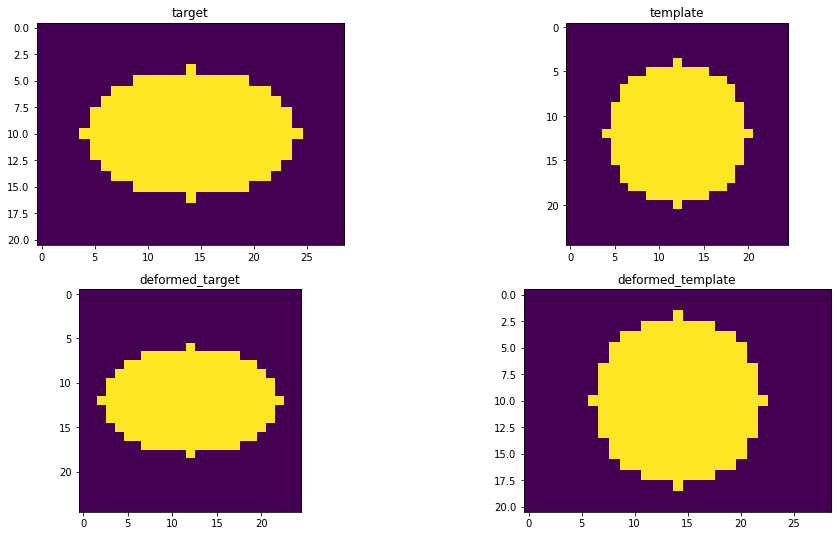

In [19]:
template = np.array([[(col-12)**2 + (row-12)**2 <= 8**2 for col in range(25)] for row in range(25)], int)
target = np.array([[(col-14)**2/10**2 + (row-10)**2/6**2 <= 1 for col in range(29)] for row in range(21)], int)

transform = ardent.Transform()
transform.register(target=target, template=template,
                   num_iterations=50, num_affine_only_iterations=50,
                   num_rigid_affine_iterations=50)

deformed_target = transform.transform_image(
    subject=target,
    output_shape=template.shape,
    deform_to='template')

deformed_template = transform.transform_image(
    subject=template,
    output_shape=target.shape,
    deform_to='target')

#plot
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.imshow(target)
plt.title("target")
plt.subplot(222)
plt.imshow(template)
plt.title("template")
plt.subplot(223)
plt.imshow(deformed_target)
plt.title("deformed_target")
plt.subplot(224)
plt.imshow(deformed_template)
plt.title("deformed_template")

In [20]:
def make_XOR(n_samples=100, cluster_center=[0,0], cluster_std=0.25, dist_from_center=0.5,
             N_XOR=False, theta_rotation=0, random_state=None):
    
    #variable setup
    seed = random_state
    dist = dist_from_center
    std = cluster_std
    n = int(n_samples/4)
    
    cluster_centers = np.array(list(itertools.product([dist, -dist], repeat=2)))
    cluster_centers = cluster_center - cluster_centers
    n_per_cluster = np.full(shape=2, fill_value=n)

    #make blobs
    X1,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[0,3], :], 
                               cluster_std=std, random_state=seed)
    X2,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[1,2], :], 
                               cluster_std=std, random_state=seed)
    
    #assign classe
    if N_XOR:
        y1, y2 = -np.ones(n*2), np.ones(n*2)
    else:
        y1, y2 = np.ones(n*2), -np.ones(n*2)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, y2))

    #rotation
    c, s = np.cos(theta_rotation), np.sin(theta_rotation)
    R = np.array([[c, -s], [s, c]])
    X = (R @ X.T).T
    
    return X,y

In [21]:
#Gaussian XOR
x1, y1 = make_XOR(n_samples=1000)
x2, y2 = make_XOR(n_samples=1000, theta_rotation=np.pi/4)
x1 = 10*x1 + 30
x2 = 15*x2 + 30

template = np.zeros((60,60)).astype(int)
target = np.zeros((60,60)).astype(int)

for i in range(len(x1)):
    j = x1[i,0].astype(int)
    k = x1[i,1].astype(int)
    if template[j,k] == 0:
        template[j,k] += y1[i]

for i in range(len(x2)):
    j = x2[i,0].astype(int)
    k = x2[i,1].astype(int)
    if target[j,k] == 0:
        target[j,k] += y2[i]

Text(0.5, 1.0, 'deformed_template')

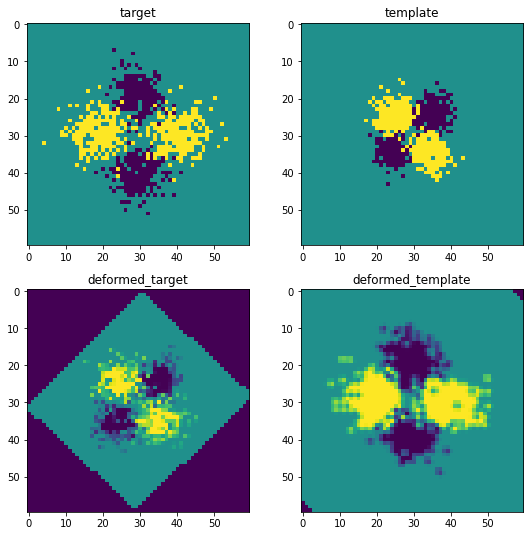

In [22]:
transform = ardent.Transform()
transform.register(target=target, template=template,
                   num_iterations=100, num_affine_only_iterations=50,
                   num_rigid_affine_iterations=50)

deformed_target = transform.transform_image(
    subject=target,
    output_shape=template.shape,
    deform_to='template')

deformed_template = transform.transform_image(
    subject=template,
    output_shape=target.shape,
    deform_to='target')

#plot
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(target)
plt.title("target")
plt.subplot(222)
plt.imshow(template)
plt.title("template")
plt.subplot(223)
plt.imshow(deformed_target)
plt.title("deformed_target")
plt.subplot(224)
plt.imshow(deformed_template)
plt.title("deformed_template")

Text(0.5, 1.0, 'deformed_template')

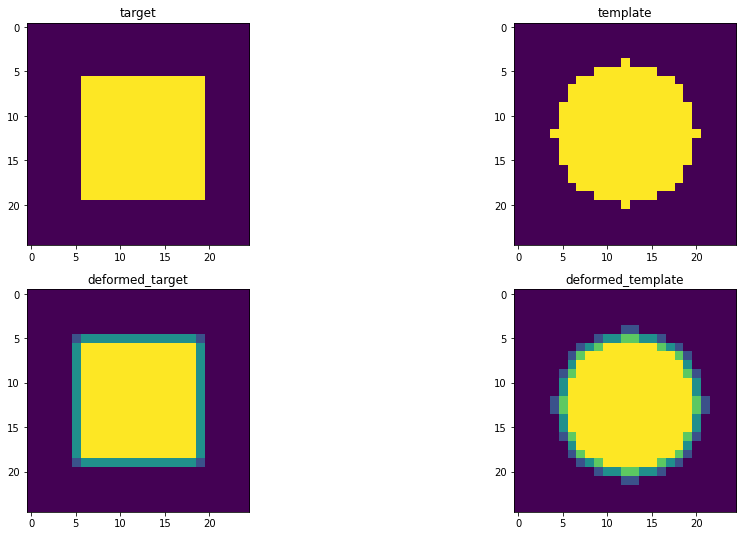

In [25]:
#square to circle
template = np.array([[(col-12)**2 + (row-12)**2 <= 8**2 for col in range(25)] for row in range(25)], int)
target = np.array([[ (col > 5 and row > 5) and (col < 20 and row < 20) for col in range(25)] for row in range(25)], int)

transform = ardent.Transform()
transform.register(target=target, template=template,
                   num_iterations=50, num_affine_only_iterations=50,
                   num_rigid_affine_iterations=50)

deformed_target = transform.transform_image(
    subject=target,
    output_shape=template.shape,
    deform_to='template')

deformed_template = transform.transform_image(
    subject=template,
    output_shape=target.shape,
    deform_to='target')

#plot
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.imshow(target)
plt.title("target")
plt.subplot(222)
plt.imshow(template)
plt.title("template")
plt.subplot(223)
plt.imshow(deformed_target)
plt.title("deformed_target")
plt.subplot(224)
plt.imshow(deformed_template)
plt.title("deformed_template")

## Mapping posteriors attempt

In [4]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

In [15]:
#Make XOR1 and 2
x1, y1 = make_XOR(n_samples=1000)
x2, y2 = make_XOR(n_samples=1000, cluster_center=[8,8], cluster_std=1, dist_from_center=5, theta_rotation=np.pi/3)

#Grid Setup for XOR1
h = 0.05 
X1 = x1.copy()
Y1 = y1.copy()
x1_min, x1_max = X1[:,0].min()-1, X1[:,0].max()+1 
y1_min, y1_max = X1[:,1].min()-1, X1[:,1].max()+1 
xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))
grid1 = np.c_[xx1.ravel(), yy1.ravel()]

#Grid Setup for XOR2
h = 0.05 
X2 = x2.copy()
Y2 = y2.copy()
x2_min, x2_max = X2[:,0].min()-1, X2[:,0].max()+1 
y2_min, y2_max = X2[:,1].min()-1, X2[:,1].max()+1 
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h), np.arange(y2_min, y2_max, h))
grid2 = np.c_[xx2.ravel(), yy2.ravel()]

#Predicting for XOR1
clf = RandomForestClassifier(n_estimators=500, max_depth=20)
ZZ1 = clf.fit(X1,Y1).predict(grid1)
ZZ1 = ZZ1.reshape(xx1.shape)

#Predicting for XOR2
clf = RandomForestClassifier(n_estimators=500, max_depth=20)
ZZ2 = clf.fit(X2,Y2).predict(grid2)
ZZ2 = ZZ2.reshape(xx2.shape)

/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


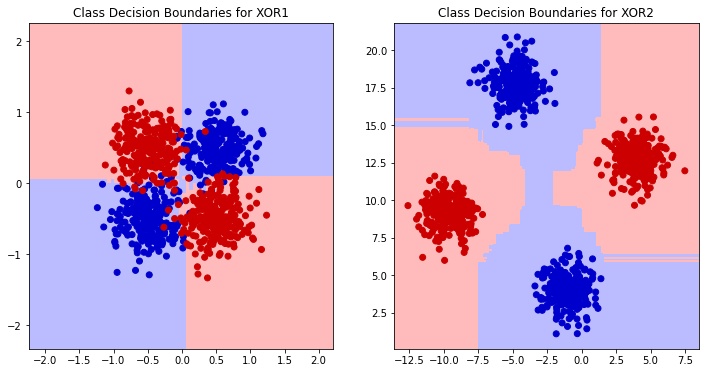

In [17]:
#Plot the decision boundary for XOR1
plt.figure(figsize=(12,6));
plt.subplot(121)
plt.pcolormesh(xx1, yy1, ZZ1, cmap=cmap_light);
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=cmap_bold);
plt.xlim(xx1.min(), xx1.max());
plt.ylim(yy1.min(), yy1.max());
plt.title('Class Decision Boundaries for XOR1');

#Plot the decision boundary for XOR2
plt.subplot(122)
plt.pcolormesh(xx2, yy2, ZZ2, cmap=cmap_light);
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=cmap_bold);
plt.xlim(xx2.min(), xx2.max());
plt.ylim(yy2.min(), yy2.max());
plt.title('Class Decision Boundaries for XOR2');

Text(0.5, 1.0, 'deformed_template')

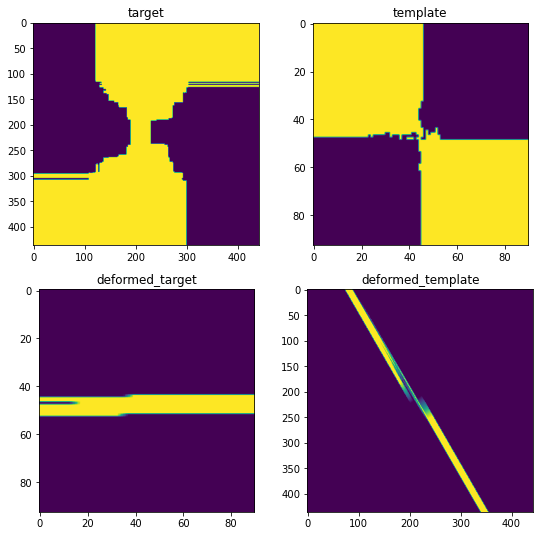

In [36]:
#square to circle
template = ZZ1
target = ZZ2

transform = ardent.Transform()
transform.register(target=target, template=template,
                   num_iterations=1000, num_affine_only_iterations=50,
                   num_rigid_affine_iterations=50)

deformed_target = transform.transform_image(
    subject=target,
    output_shape=template.shape,
    deform_to='template')

deformed_template = transform.transform_image(
    subject=template,
    output_shape=target.shape,
    deform_to='target')

#plot
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(target)
plt.title("target")
plt.subplot(222)
plt.imshow(template)
plt.title("template")
plt.subplot(223)
plt.imshow(deformed_target)
plt.title("deformed_target")
plt.subplot(224)
plt.imshow(deformed_template)
plt.title("deformed_template")